In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
churn_df=pd.read_csv("dataset.csv")
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
churn_df.isnull().sum().sum()

np.int64(0)

In [5]:
churn_df.duplicated().sum()

np.int64(0)

In [6]:
churn_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


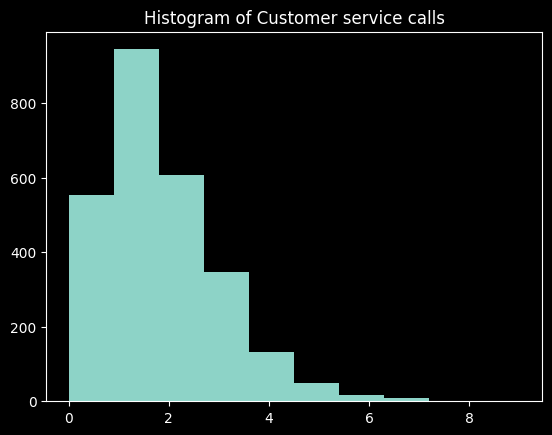

In [7]:
plt.style.use("dark_background")
plt.hist(churn_df["Customer service calls"])
plt.title("Histogram of Customer service calls")
plt.show()

Churn
False    2278
True      388
Name: count, dtype: int64


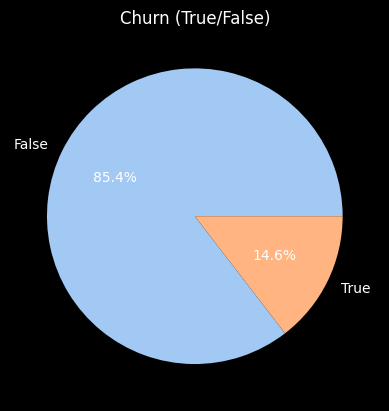

In [8]:
plt.style.use("dark_background")
print(churn_df["Churn"].value_counts())
churn_df["Churn"].value_counts().plot(kind="pie" ,colors=sns.color_palette("pastel"), autopct="%1.1f%%")
plt.title("Churn (True/False)")
plt.ylabel("")
plt.show()

In [9]:
churn_df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [10]:
churn_df.groupby("Churn")["Total day charge"].mean()

Churn
False    29.768266
True     34.881340
Name: Total day charge, dtype: float64

In [11]:
churn_df.groupby(["Churn","State"])["Total day charge"].mean()

Churn  State
False  AK       30.881000
       AL       31.634746
       AR       29.492222
       AZ       29.029762
       CA       31.793158
                  ...    
True   VT       37.581667
       WA       35.597000
       WI       39.770000
       WV       28.805714
       WY       39.196250
Name: Total day charge, Length: 102, dtype: float64

In [12]:
churn_df.groupby("Churn")["Total night charge"].mean()

Churn
False    9.020975
True     9.238892
Name: Total night charge, dtype: float64

Area code
408    17.092795
415    16.997754
510    17.042784
Name: Total eve charge, dtype: float64


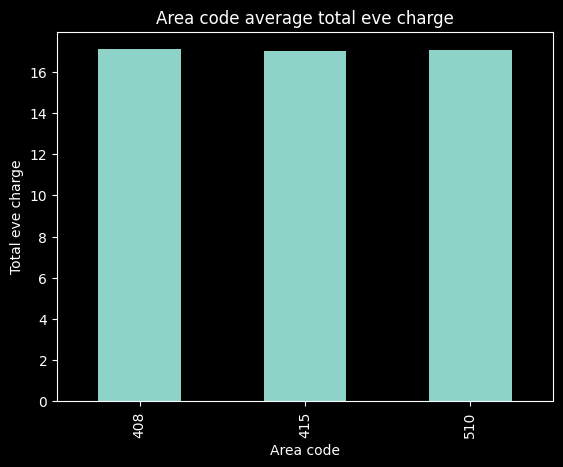

In [13]:
print(churn_df.groupby("Area code")["Total eve charge"].mean())
plt.style.use("dark_background")
churn_df.groupby("Area code")["Total eve charge"].mean().plot(kind="bar" )
plt.ylabel("Total eve charge")
plt.title("Area code average total eve charge")
plt.show()

In [14]:
churn_df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [15]:
print(churn_df["Churn"].unique())


[False  True]


In [72]:
df = churn_df.copy()
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0, True:1, False:0})
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})


In [73]:
x = df[["Area code","International plan","Voice mail plan",
        "Customer service calls","Total day minutes","Total intl minutes"]]
y = df["Churn"]   


In [63]:
x.head(2)

,Area code,International plan,Voice mail plan,Customer service calls,Total day minutes,Total intl minutes
0,415,0,1,1,265.1,10.0
1,415,0,1,1,161.6,13.7


In [64]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [66]:
y = churn_df[["Churn"]].copy()
y["Churn"] = y["Churn"].astype(int)


In [67]:
print(y["Churn"].unique())
print(y["Churn"].value_counts())



[0 1]
Churn
0    2278
1     388
Name: count, dtype: int64


In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred = model.predict(X_test)


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9044943820224719


In [76]:
print(confusion_matrix(y_test, y_pred))

[[443  12]
 [ 39  40]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       455
           1       0.77      0.51      0.61        79

    accuracy                           0.90       534
   macro avg       0.84      0.74      0.78       534
weighted avg       0.90      0.90      0.90       534



In [92]:
import pickle
model.fit(X_train, y_train)
with open("churn_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [85]:
from sklearn.linear_model import LogisticRegression


In [86]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [87]:
y_pred_log = log_model.predict(X_test)


In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.8595505617977528


In [89]:
print(confusion_matrix(y_test, y_pred_log))

[[443  12]
 [ 63  16]]


In [90]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       455
           1       0.57      0.20      0.30        79

    accuracy                           0.86       534
   macro avg       0.72      0.59      0.61       534
weighted avg       0.83      0.86      0.83       534



In [93]:
log_model.predict_proba(X_test)[:,1]

array([0.87514312, 0.27412726, 0.07472293, 0.2401305 , 0.31228364,
       0.41137212, 0.01566338, 0.26873631, 0.09577795, 0.23129525,
       0.1946466 , 0.17802933, 0.03184334, 0.04720543, 0.62283173,
       0.19086341, 0.19238113, 0.03202724, 0.30448425, 0.04610933,
       0.04723308, 0.03580804, 0.01334015, 0.38506472, 0.04283062,
       0.07959945, 0.06604042, 0.37228311, 0.11622372, 0.19314513,
       0.12124932, 0.06862175, 0.09500683, 0.50483236, 0.05978364,
       0.04842312, 0.33365136, 0.10217577, 0.04372646, 0.07861499,
       0.04737917, 0.13679356, 0.30798755, 0.01477831, 0.07430617,
       0.0857599 , 0.62307989, 0.16764521, 0.0474809 , 0.11634841,
       0.07447728, 0.15348916, 0.03794355, 0.01986024, 0.05046519,
       0.12931565, 0.07090947, 0.13995109, 0.22019244, 0.00643446,
       0.01383105, 0.09353439, 0.01259287, 0.07033577, 0.60203911,
       0.08803441, 0.15164894, 0.0372531 , 0.04848332, 0.1448555 ,
       0.30212818, 0.00863247, 0.12879546, 0.01411576, 0.13794